# intro

regression :  predict number
* indep var
* dep var

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.1


# create data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create features (var X)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# create labels (var y)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

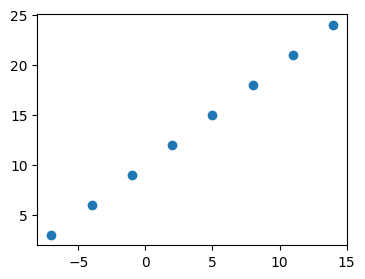

In [4]:
plt.figure(figsize=(4,3))
plt.scatter(X,y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shape

In [6]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

### Note: Code update for upcoming lecture(s) for TensorFlow 2.7.0+ fix
* This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).
* The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [10]:
# turn our np array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

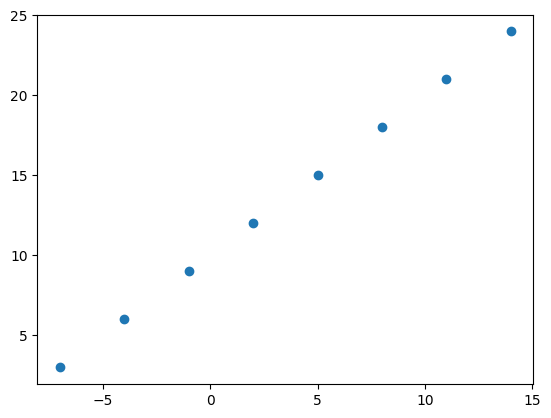

In [12]:
plt.scatter(X,y);

## step in modeling with tensorflow
1. create model (define input, output layer)
2. compile model (define loss fn, optimizer, evaluation matrics)
3. fitting a model (find pattern X,y: X_train, y_train, epochs)
4. evaluate model (verifyt with X_test, y_test)

In [13]:
from IPython.display import Image

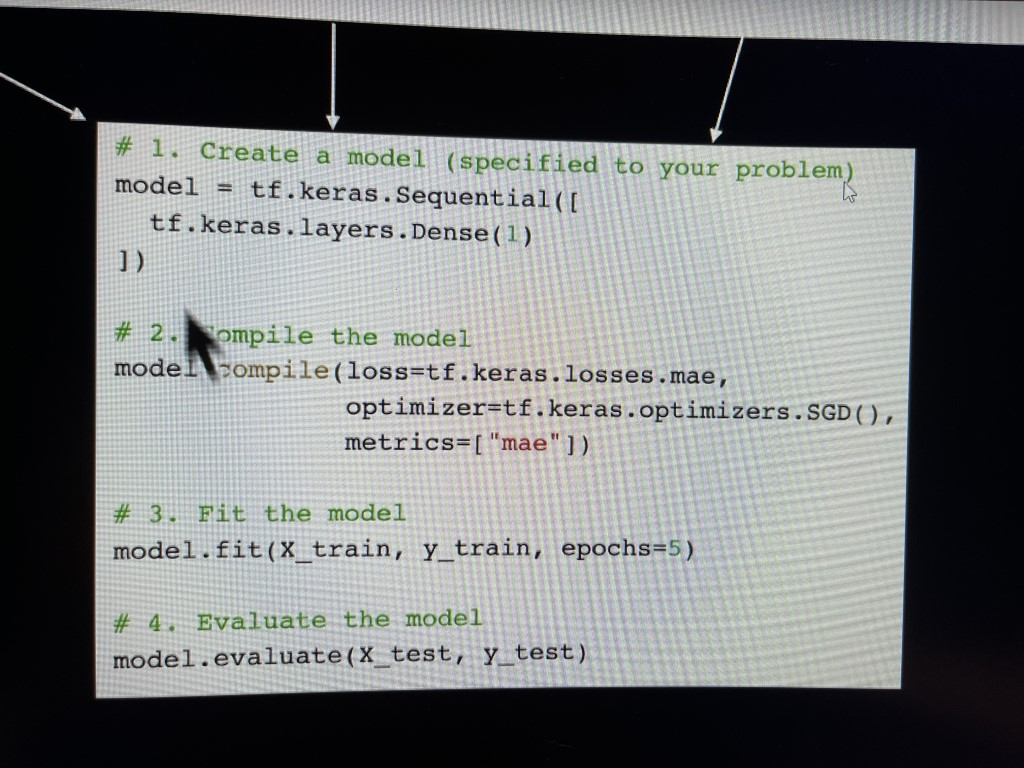

In [14]:
Image("img_4125.jpg")

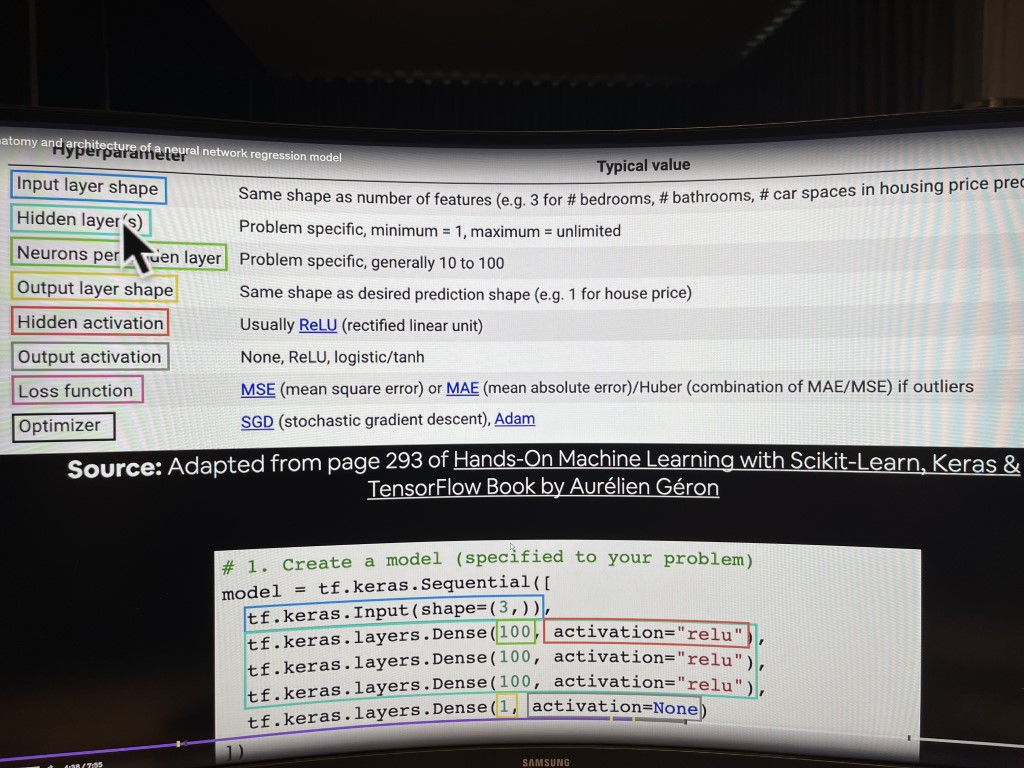

In [15]:
Image("img_4123.jpg")

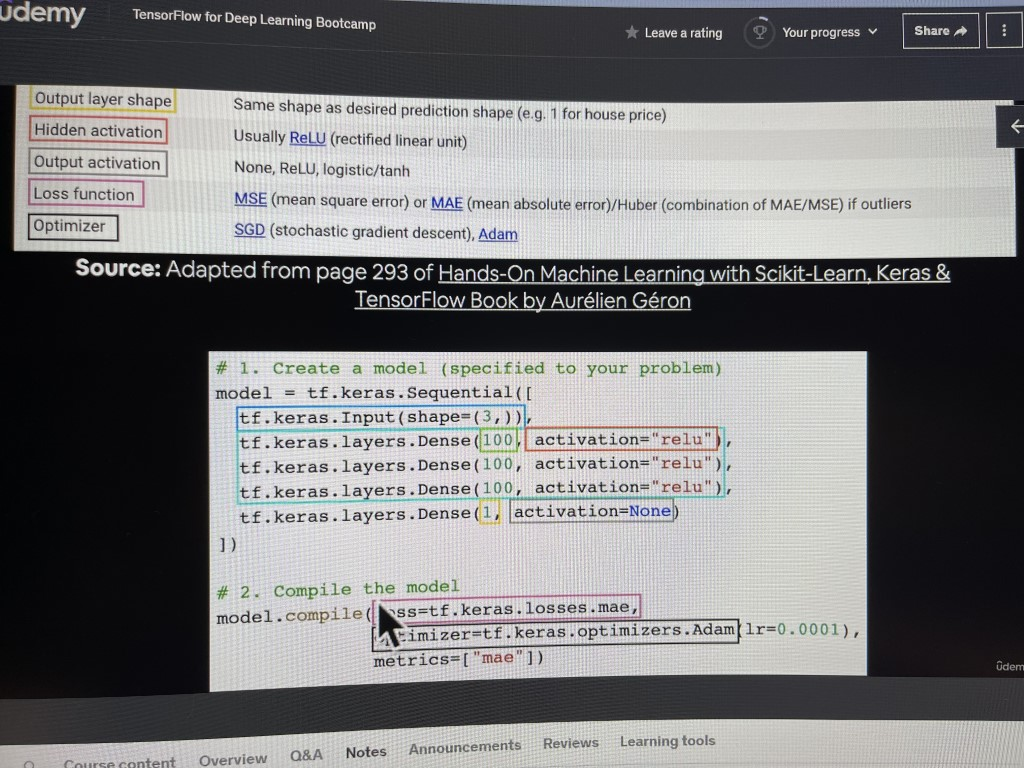

In [16]:
Image("img_4124.jpg")

In [17]:
## set random seed
tf.random.set_seed(42)

In [18]:
## 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [19]:
## 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [20]:
print(X.shape)

(8,)


In [21]:
# Expanded dimension
print(tf.expand_dims(X, axis=-1).shape)

(8, 1)


In [22]:
## 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 869ms/step - loss: 13.1790 - mae: 13.1790
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 13.0465 - mae: 13.0465
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 12.9140 - mae: 12.9140
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 12.7815 - mae: 12.7815
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 12.6490 - mae: 12.6490
Epoch 1/5
1/1 [==============================] - 0s 4ms/step - loss: 12.5165 - mae: 12.5165
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 12.3840 - mae: 12.3840
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 12.2515 - mae: 12.2515
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.1190 - mae: 12.1190
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 11.9865 - mae: 11.9865


In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[7.6089554]], dtype=float32)

## improve model

Use the dash sign “-  ” with two spaces after it or a space, a dash, and a space ” – “,

- creating model
   - add more layers
   - define activation function
- compiling model
   - optimization function
- fitting model
   - more **epoch**
   - more training data (X_train)

In [25]:
## set random seed
tf.random.set_seed(42)

In [26]:
# 1. create model
model2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [27]:
# 2. compile the model
model2.compile(loss =tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
             # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["mae"])

In [28]:
## 3. fit the model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 21.5833 - mae: 21.5833
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 21.1902 - mae: 21.1902
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 20.7970 - mae: 20.7970
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 20.4343 - mae: 20.4343
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 20.1531 - mae: 20.1531
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 19.8718 - mae: 19.8718
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 19.5906 - mae: 19.5906
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 19.3093 - mae: 19.3093
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 19.0281 - mae: 19.0281
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 18.7468 - mae: 18.7468
Epoch 11/100
1/1 [==============================] - 0s 3m

In [29]:
model2.predict([17.0])

1/1 [==============================] - 0s 40ms/step


array([[29.220943]], dtype=float32)

### model 3

In [30]:
## set random seed
tf.random.set_seed(42)

In [31]:
# 1. create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [32]:
# 2. compile the model
model3.compile(loss =tf.keras.losses.mae,
            # optimizer=tf.keras.optimizers.SGD(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

In [33]:
## 3. fit the model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 211ms/step - loss: 12.2591 - mae: 12.2591
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4316 - mae: 11.4316
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5925 - mae: 10.5925
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7476 - mae: 9.7476
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8638 - mae: 8.8638
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0048 - mae: 8.0048
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2501 - mae: 7.2501
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.4471 - mae: 6.4471
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 5.5952 - mae: 5.5952
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 4.6918 - mae: 4.6918
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

In [34]:
model3.predict([17.0])

1/1 [==============================] - 0s 42ms/step


array([[26.375868]], dtype=float32)

**OVERFITTING** surprising >> learning rate worse, but outcome is better

## evaluating a model

build model > fit > evaluate > tweak > fit > evaluate > ...

In [35]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [36]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

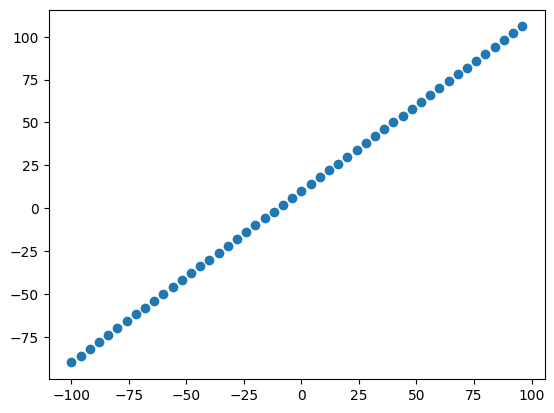

In [37]:
# Visualize
plt.scatter(X,y);

In [38]:
## the 3 sets 

# training set 70-80%
# validation set 10-15% (for tuned)
# test set 10-15% (for evaluation)

In [39]:
len(X)

50

In [40]:
X_shuffle = tf.random.shuffle(X)
X_shuffle

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  48, -100,  -24,  -32,   52,   36,  -48,  -52,   56,   16,  -12,
        -40,  -88,  -56,    4,   92,   -8,  -68,  -92,    8,   64,  -96,
         40,  -36,   32,  -44,  -28,   20,    0,  -16,   60,   24,  -72,
         80,   84,   -4,  -64,  -20,   44,   12,   68,   76,   72,  -60,
        -84,   96,  -76,   28,   88,  -80])>

In [41]:
y_shuffle = tf.random.shuffle(y)
y_shuffle

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([102,  66,  58,  78, -66, -58,  14,  90,  -2, -30,  34,  62,  30,
        38,  18,  86,  94, -86, -26, -34, -42, 106,  98,  26, -90,   2,
       -50,  82,  70, -38,  10,  42,  -6, -14, -82, -62, -10,   6,  54,
       -46, -74, -22,  74, -18, -54,  46, -70,  50,  22, -78])>

In [42]:
# X_split = tf.split(X_shuffle, 2)
# X_split

In [43]:
 # X_train = np.concatenate((X_train, tr))
 #        X_validate = np.concatenate((X_validate, va))
 #        X_test = np.concatenate((X_test, te))
 #        y_train = np.concatenate((y_train, np.full(num_train, label)))
 #        y_validate = np.concatenate((y_validate, np.full(num_validate, label)))
 #        # y_test =

In [44]:
# tf.split(tf.random.shuffle(...

In [45]:
# tf.split

In [46]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# unable to use : Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes

In [47]:
# https://discuss.tensorflow.org/t/splitting-dataset-into-train-validate-test-and-ensuring-equal-representation-of-classes/16001/3

In [48]:
# def shuffle_pairs(X, y):
#     """
#     Shuffles a pair of arrays by their first dimension, maintaining correspondance between
#     the arrays.

#     PARAMETERS:
#         X: ndarray
#             A three-dimensional array of examples of the form (examples, times, channels)
#         y: ndarray
#             A one-dimensional array of labels of the form (examples,)

#     RETURNS:
#         X, y
#     """
#     assert X.shape[0] == y.shape[0]

#     p = np.random.permutation(X.shape[0])
#     return X[p], y[p]


# def train_validate_test_split(X, y, validate_size=0.1, test_size=0.1):
#     """
#     Divide examples and labels into train, validate, and test datasets, while maintaining
#     the proportion of classes in labels.

#     PARAMETERS:
#         X: ndarray
#             A three-dimensional array of examples of the form (examples, times, channels)
#         y: ndarray
#             A one-dimensional array of labels of the form (examples,)
#         validate_size: float
#             Proportion of examples to use for validation (default 0.1)
#         test_size: float
#             Proportion of examples to use for test (default 0.1)

#     RETURNS:
#         X_train, X_validate, X_test, y_train, y_validate, y_test
#     """
#     assert len(X) == len(y)

#     # np.random.seed(random_state)
#     train_size = 1 - validate_size - test_size

#     assert (train_size + validate_size + test_size) == 1

#     labels, counts = np.unique(y, return_counts=True)

#     X_train = np.empty((0, X.shape[1], X.shape[2]))
#     X_validate = np.empty((0, X.shape[1], X.shape[2]))
#     X_test = np.empty((0, X.shape[1], X.shape[2]))
#     y_train = np.empty((0))
#     y_validate = np.empty((0))
#     y_test = np.empty((0))
#     for label in labels:
#         num_validate = int(counts[label] * validate_size)
#         num_test = int(counts[label] * test_size)
#         num_train = counts[label] - num_validate - num_test

#         Xs_this_class = X[y == label]
#         tr, va, te = np.split(Xs_this_class, [num_train, num_train + num_validate])
#         X_train = np.concatenate((X_train, tr))
#         X_validate = np.concatenate((X_validate, va))
#         X_test = np.concatenate((X_test, te))
#         y_train = np.concatenate((y_train, np.full(num_train, label)))
#         y_validate = np.concatenate((y_validate, np.full(num_validate, label)))
#         y_test = np.concatenate((y_test, np.full(num_test, label)))

#     X_train, y_train = shuffle_pairs(X_train, y_train)
#     X_validate, y_validate = shuffle_pairs(X_validate, y_validate)
#     X_test, y_test = shuffle_pairs(X_test, y_test)

#     print(
#         f"X_train.shape = {X_train.shape}, X_validate.shape = {X_validate.shape}, X_test.shape = {X_test.shape}"
#     )

#     print(f"There are {len(labels)} unique classes")
#     print(list(zip(labels, counts)))
#     print(f"y_train {np.unique(y_train, return_counts=True)}")
#     print(f"y_validate {np.unique(y_validate, return_counts=True)}")
#     print(f"y_test {np.unique(y_test, return_counts=True)}")

#     return X_train, X_validate, X_test, y_train, y_validate, y_test

In [49]:
# https://gist.github.com/angeligareta/e3332c7a955dba8eaca71bf388d028c2

In [50]:
# Method to split a tensorflow dataset (tf.data.Dataset) into train, validation and test splits
# def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
#     assert (train_split + test_split + val_split) == 1
    
#     if shuffle:
#         # Specify seed to always have the same split distribution between runs
#         ds = ds.shuffle(shuffle_size, seed=12)
    
#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)
    
#     train_ds = ds.take(train_size)    
#     val_ds = ds.skip(train_size).take(val_size)
#     test_ds = ds.skip(train_size).skip(val_size)
    
#     return train_ds, val_ds, test_ds

In [51]:
X_train =  X[:40]  # first 40
y_train =  y[:40]  # first 40

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [52]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])>

In [53]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])>

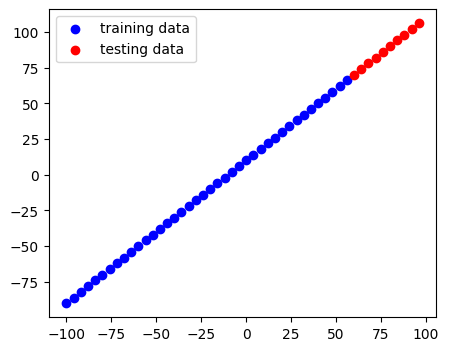

In [54]:
plt.figure(figsize=(5,4))
plt.scatter(X_train, y_train, c="b", label = "training data")
plt.scatter(X_test, y_test, c="r", label = "testing data")
plt.legend()
plt.show()

### create model way#2

input_shape=[1] ????

In [55]:
tf.random.set_seed(42)

In [56]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [71]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1,input_shape=[1])
    tf.keras.layers.Dense(5,input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics= ["mae"])

### visualize model

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [68]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [69]:
model.fit(X_train, y_train, epochs=100)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 43.6381 - mae: 43.6381
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 13.8578 - mae: 13.8578
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7069 - mae: 12.7069
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7487 - mae: 8.7487
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9526 - mae: 10.9526
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1222 - mae: 10.1222
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1500 - mae: 9.1500
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1179 - mae: 9.1179
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1442 - mae: 15.1442
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5750 - mae: 7.5750
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

In [61]:
# https://deeplizard.com/learn/video/8d-9SnGt5E0

In [62]:
# https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters

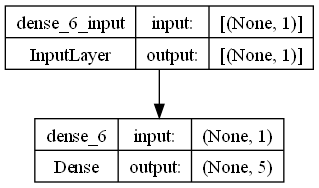

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)